# Credit Card Fraud Prediction using Stacking Classifier

Stacking: 

Stacking is a way of ensembling classification or regression models. It consists of two-layer estimators. The first layer consists of all the baseline models that are used to predict the outputs on the test datasets. The second layer consists of Meta-Classifier or Regressor which takes all the predictions of baseline models as an input and generate new predictions.

Why Stacking? 

Most of the Machine-Learning and Data science competitions are won by using Stacked models. They can improve the existing accuracy that is shown by individual models. We can get most of the Stacked models by choosing diverse algorithms in the first layer of architecture as different algorithms capture different trends in training data by combining both of the models can give better and accurate results.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

RANDOM_SEED = 101
LABELS = ['Normal', 'Fraud']

In [2]:
# Import the Dataset
data = pd.read_csv('Sample-Dataset/CreditCard.csv', sep = ',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

In [3]:
# Taking 10% data only for building the model due to time constraints. Set the percentage in parameter 'frac'
data1 = data.sample(frac = 1, random_state = 101)
data1.shape

(69895, 31)

In [4]:
fraud = data1[data1['Class'] == 1]
valid = data1[data1['Class'] == 0]

In [5]:
print(fraud.shape)
print(valid.shape)

(135, 31)
(69760, 31)


In [6]:
outlier_fraction = len(fraud)/float(len(valid))
outlier_fraction

0.0019352064220183487

# Train Test Split

In [7]:
# Split the data into target and feature variables
columns = data1.columns.tolist()
columns = [c for c in columns if c not in ['Class']]
target  = 'Class'
state = np.random.RandomState(101)
x = data1[columns]
y = data1[target]
x_outlier = state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))
print(x.shape)
print(y.shape)

(69895, 30)
(69895,)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size  = 0.2, random_state = 101)

# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# Stacking Classifier

In [9]:
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

3-Fold Cross Validation :

KNN
------------------------------------------------
Accuracy  : 1.00 (+/- 0.00)
Precision : 0.00 (+/- 0.00)
Recall    : 0.00 (+/- 0.00)
F1 Score  : 0.00 (+/- 0.00)
------------------------------------------------

Naive Bayes
------------------------------------------------
Accuracy  : 0.99 (+/- 0.00)
Precision : 0.12 (+/- 0.01)
Recall    : 0.91 (+/- 0.03)
F1 Score  : 0.21 (+/- 0.01)
------------------------------------------------

Logistic Regression
------------------------------------------------
Accuracy  : 1.00 (+/- 0.00)
Precision : 0.72 (+/- 0.09)
Recall    : 0.56 (+/- 0.04)
F1 Score  : 0.63 (+/- 0.01)
------------------------------------------------

Decision Tree
------------------------------------------------
Accuracy  : 1.00 (+/- 0.00)
Precision : 0.87 (+/- 0.05)
Recall    : 0.79 (+/- 0.06)
F1 Score  : 0.83 (+/- 0.01)
------------------------------------------------

Stacking Classifier
------------------------------------------------
Accuracy  

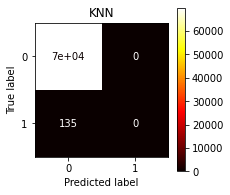

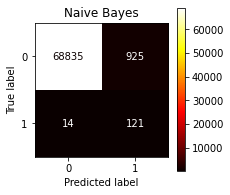

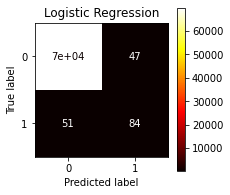

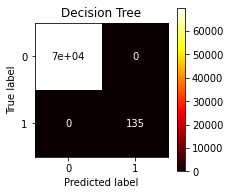

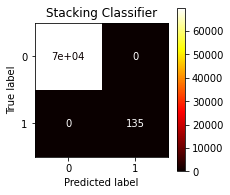

In [10]:
# Initialize the models to be used in Stacking Classifier:
clf1 = KNeighborsClassifier(n_neighbors = 10)
clf2 = GaussianNB()
clf3 = RandomForestClassifier(random_state = 101)
clf4 = LogisticRegression(random_state = 101)
clf5 = DecisionTreeClassifier(random_state = 101)

# Initialize the Stacking Classifier Instance
sclf = StackingClassifier(classifiers = [clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier = clf3,
                          use_probas = True, 
                          use_features_in_secondary = True)

print('3-Fold Cross Validation :\n')

for clf, label in zip([clf1, clf2, clf4, clf5, sclf], ['KNN', 'Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Stacking Classifier']):
    
    print(label)
    print('------------------------------------------------')
    
    scores_accuracy = cross_val_score(clf, x, y, cv = 3, scoring = 'accuracy', n_jobs = -1)
    print("Accuracy  : %0.2f (+/- %0.2f)" %(scores_accuracy.mean(), scores_accuracy.std()))
    
    scores_precision = cross_val_score(clf, x, y, cv = 3, scoring = 'precision', n_jobs = -1)
    print("Precision : %0.2f (+/- %0.2f)" %(scores_precision.mean(), scores_precision.std()))
    
    scores_recall = cross_val_score(clf, x, y, cv = 3, scoring = 'recall', n_jobs = -1)
    print("Recall    : %0.2f (+/- %0.2f)" %(scores_recall.mean(), scores_recall.std()))
    
    scores_f1 = cross_val_score(clf, x, y, cv = 3, scoring = 'f1', n_jobs = -1)
    print("F1 Score  : %0.2f (+/- %0.2f)" %(scores_f1.mean(), scores_f1.std()))
    
    fig, ax = plt.subplots(figsize=(3,3))
    plot_confusion_matrix(clf.fit(x, y), x, y, cmap='hot', normalize=None, ax=ax)
    ax.set_title(label)
    plt.grid(False)
    
    print('------------------------------------------------', end = '\n\n')